In [1]:
import matplotlib.pyplot as plt
import hvplot.pandas
import pandas as pd
import scipy.stats as st
from api_key import weather_api_key
from matplotlib.ticker import NullFormatter
import requests


# read csv
csv = "Billionaire_Data.csv"
data_df = pd.read_csv(csv)

In [2]:
data_df["gdp_country"] = data_df["gdp_country"].str.replace("$", "")
data_df["gdp_country"] = data_df["gdp_country"].str.replace(",", "")
data_df["gdp_country"]=data_df["gdp_country"].astype(float)

In [3]:
data_df["finalWorth"]/=1000
data_df['gdp_country']/=1000000000
data_df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211.0,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,2715.518274,65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180.0,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,21427.700000,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114.0,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,21427.700000,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107.0,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,21427.700000,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106.0,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,21427.700000,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [4]:
data_df["Percent_Of_GDP"] = (data_df["finalWorth"]/data_df["gdp_country"])*100

per_gdp = data_df.groupby("country")["Percent_Of_GDP"].sum()

per_gdp

country
Algeria            2.706070
Andorra           47.557781
Argentina          2.446274
Armenia            8.776548
Australia         12.457989
                    ...    
United Kingdom    13.112315
United States     21.351335
Uruguay            3.211653
Uzbekistan        24.861326
Vietnam            4.810606
Name: Percent_Of_GDP, Length: 78, dtype: float64

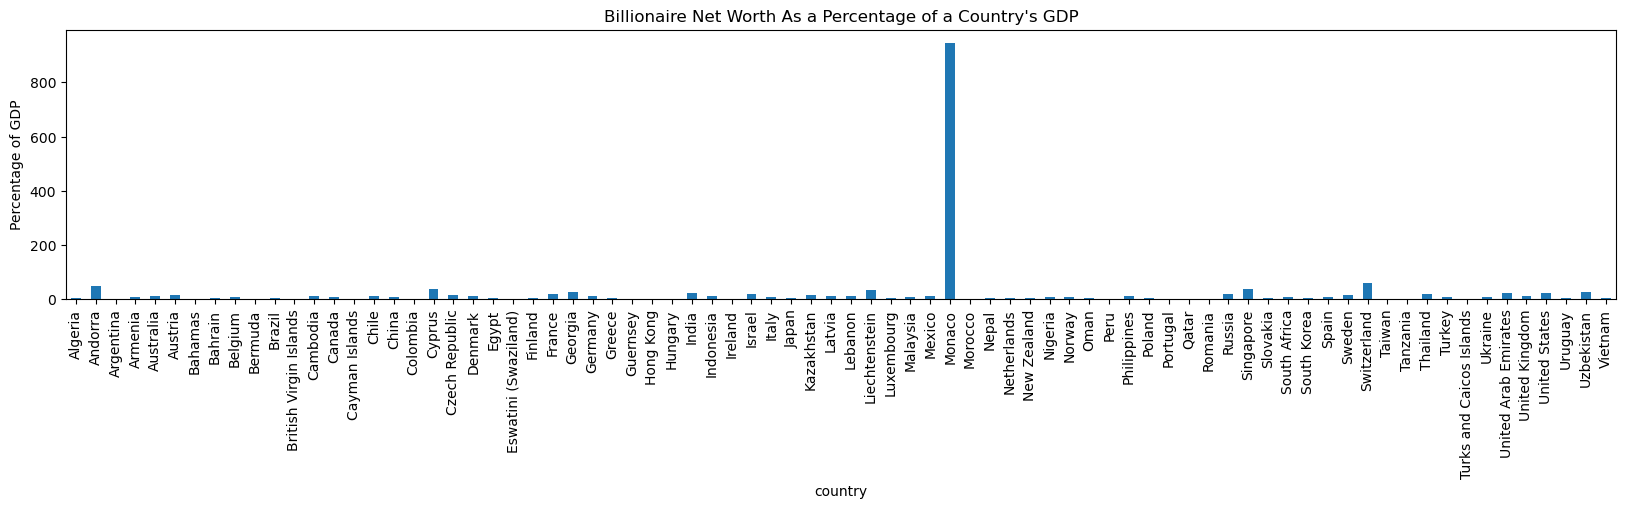

In [34]:
per_gdp.plot(kind = 'bar', figsize=(20,3.5))
plt.title("Billionaire Net Worth As a Percentage of a Country's GDP")
plt.ylabel("Percentage of GDP")
plt.savefig("Output/GDPtoFW")

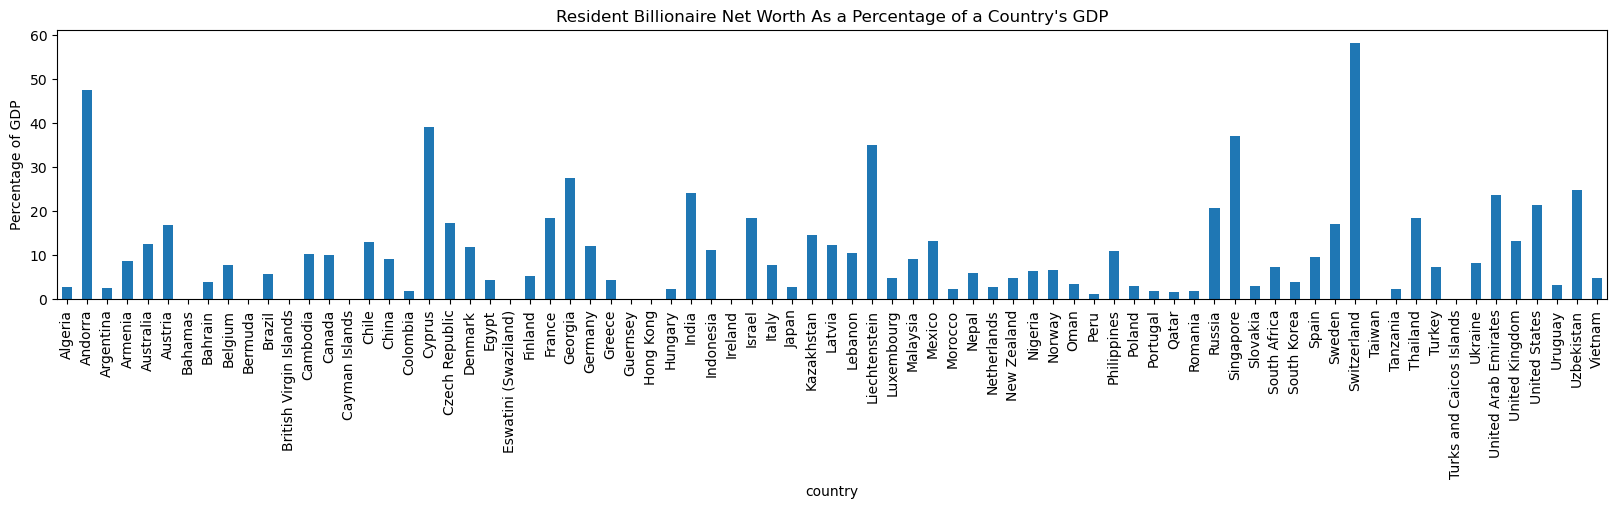

In [35]:
per_gdp_no_Monaco = per_gdp.drop("Monaco")
per_gdp_no_Monaco.plot(kind = 'bar', figsize=(20,3.5))
plt.title("Resident Billionaire Net Worth As a Percentage of a Country's GDP")
plt.ylabel("Percentage of GDP")
plt.savefig("Output/GDPtoFWrmvOutlier")

In [8]:
data_df['city_lat'] = ''
data_df['city_lon'] = ''
data_copy = data_df.copy()

In [7]:
#Pull city lat and lon
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(data_df['city']):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (f"{url}{city}&appid={weather_api_key}")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude
        data_df.loc[i, 'city_lat'] = city_weather["coord"]["lat"]
        data_df.loc[i, 'city_lon'] = city_weather["coord"]["lon"]
    


    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    if i == 10:
        exit
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Paris
Processing Record 2 of Set 1 | Austin
Processing Record 3 of Set 1 | Medina
Processing Record 4 of Set 1 | Lanai
Processing Record 5 of Set 1 | Omaha
Processing Record 6 of Set 1 | Medina
Processing Record 7 of Set 1 | New York
Processing Record 8 of Set 1 | Mexico City
Processing Record 9 of Set 1 | Mumbai
Processing Record 10 of Set 1 | Hunts Point
Processing Record 11 of Set 1 | Paris
Processing Record 12 of Set 1 | Palo Alto
Processing Record 13 of Set 1 | La Coruna
City not found. Skipping...
Processing Record 14 of Set 1 | Los Altos
Processing Record 15 of Set 1 | Hangzhou
Processing Record 16 of Set 1 | Palo Alto
Processing Record 17 of Set 1 | Wichita
Processing Record 18 of Set 1 | New York
Processing Record 19 of Set 1 | Bentonville
Processing Record 20 of Set 1 | Bentonville
Processing Record 21 of Set 1 | Fort Worth
Processing Record 22 of Set 1 | Toronto
Processing Record 23 of

In [8]:
data_df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,Percent_Of_GDP,city_lat,city_lon
0,1,211.0,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749,7.770156,48.8534,2.3488
1,2,180.0,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,0.840034,30.2672,-97.7431
2,3,114.0,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,0.532022,24.4686,39.6142
3,4,107.0,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,0.499354,7.2802,8.4720
4,5,106.0,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,0.494687,41.2586,-95.9378


In [17]:
#for data in data_df["city_lat"]:
#    if (type(data) == float):
#       data = float(data)

data_df["city_lat"] = pd.to_numeric(data_df["city_lat"], errors='coerce')

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   float64
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [26]:
data_df.loc[~data_df.city_lat.isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2596 entries, 0 to 2639
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2596 non-null   int64  
 1   finalWorth                                  2596 non-null   float64
 2   category                                    2596 non-null   object 
 3   personName                                  2596 non-null   object 
 4   age                                         2531 non-null   float64
 5   country                                     2558 non-null   object 
 6   city                                        2524 non-null   object 
 7   source                                      2596 non-null   object 
 8   industries                                  2596 non-null   object 
 9   countryOfCitizenship                        2596 non-null   object 
 10  organization     

In [33]:
map = data_df.loc[~data_df.city_lat.isnull()].hvplot.points(
    "city_lon",
    "city_lat",
    geo = True, 
    tiles = "OSM",
    frame_width = 800,
    frame_height = 800,
    size = "finalWorth",
    scale = 1,
    color ="personName"
    )
plt.savefig("Output/BillionaireMap")
map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [city_lon,city_lat]   (personName,finalWorth)

<Figure size 640x480 with 0 Axes>

In [31]:
len(data_df["city"].unique())

742